# 파이썬으로 시작하는 데이터 분석 (Zoo 데이터셋) 🦁

이 노트북은 **Zoo(동물) 데이터셋**을 사용하여 데이터 분석의 기초 3단계(**불러오기, 살펴보기, 시각화하기**)를 실습합니다. 

동물들의 특징을 기반으로 **어떤 종류(Type)의 동물인지 분류**하는 문제를 다룹니다. 각 코드 셀은 **한 줄 한 줄 상세한 주석**과 함께 설명되어 있어, 파이썬이나 데이터 분석이 처음인 분들도 쉽게 따라 하실 수 있도록 구성되었습니다.

## 준비: Google Colab에 파일 업로드하기

이 코드를 실행하기 전에, 먼저 `zoo.dat` 파일을 Colab 환경에 업로드해야 합니다.

1.  화면 왼쪽의 **폴더 모양 아이콘**을 클릭하여 파일 탐색기를 엽니다.
2.  **'세션 저장소에 업로드' 아이콘**(파일 위 화살표 모양)을 클릭하거나, 컴퓨터에 있는 `zoo.dat` 파일을 탐색기 창으로 드래그 앤 드롭합니다.
3.  `zoo.dat` 파일이 목록에 나타나면 준비 완료입니다.

## 1단계: 라이브러리 불러오기 (Import Libraries)

데이터 분석을 시작하기 전에, 필요한 도구들이 들어있는 '도구 상자(라이브러리)'를 파이썬으로 가져와야 합니다. `import` 키워드는 특정 라이브러리를 이 노트북에서 사용하겠다고 선언하는 역할을 합니다.

In [9]:

# 'pandas'는 파이썬에서 데이터를 표(엑셀 시트와 유사한 형태)로 다루기 위한 가장 핵심적인 라이브러리입니다.
# 데이터를 불러오고, 정제하고, 기본적인 분석을 할 때 반드시 필요합니다.
# 'as pd'는 앞으로 이 노트북에서 pandas를 pd라는 짧은 이름으로 부르겠다는 약속(별명)입니다.
import pandas as pd

# 'matplotlib'는 파이썬의 대표적인 데이터 시각화 라이브러리로, 그래프를 그리는 기본 틀을 제공합니다.
# 그중에서도 pyplot 모듈은 그래프를 그리고 꾸미는 대부분의 기능을 포함하고 있습니다.
# 'as plt'는 pyplot을 plt라는 짧은 이름으로 부르겠다는 약속입니다.
import matplotlib.pyplot as plt

# 'seaborn'은 matplotlib을 기반으로 만들어진 라이브러리로, 더 다채롭고 통계적으로 아름다운 그래프를 쉽게 그릴 수 있게 도와줍니다.
# 'as sns'는 seaborn을 sns라는 짧은 이름으로 부르겠다는 약속입니다.
import seaborn as sns

## 2단계: 데이터 불러오기 (Load Data)

준비 단계에서 업로드한 `zoo.dat` 파일을 pandas를 이용해 표 형태의 데이터 구조인 **데이터프레임(DataFrame)**으로 불러옵니다. 이 데이터셋은 각 동물의 특징을 나타냅니다.

In [10]:
# 분석할 파일의 이름인 'zoo.dat'를 file_path라는 변수에 문자열로 저장합니다.
file_path = 'zoo.dat'

# 원본 데이터 파일에는 각 열이 무엇을 의미하는지 이름이 적혀있지 않습니다.
# 따라서 우리가 직접 각 열에 해당하는 이름을 리스트(list) 형태로 만들어줍니다.
# 순서대로 털, 깃털, 알, 젖, 비행 여부 등 16가지 특징과 마지막 동물 종류(type)를 의미합니다.
column_names = [
    'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 
    'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'
]

# pandas의 read_csv 함수를 사용해 텍스트 파일을 데이터프레임으로 읽어옵니다.
# df라는 변수에 결과를 저장하는데, df는 DataFrame의 약자로 관례적으로 많이 사용됩니다.
df = pd.read_csv(
    file_path,               # 첫 번째 인자: 읽어올 파일의 경로
    sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻입니다.
    header=None,             # header: 파일의 첫 번째 줄이 열 이름(header)인지 여부를 지정합니다. None은 열 이름이 없다는 뜻입니다.
    names=column_names       # names: 열 이름이 없을 경우, 이 파라미터를 통해 우리가 직접 만든 column_names 리스트를 열 이름으로 사용하도록 지정합니다.
)

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jacob\AppData\Local\Temp\ipykernel_21136\367549138.py:16: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',              # sep: 데이터를 구분하는 기준(구분자)을 지정합니다. '\s+'는 공백(space)이 한 개 이상이라는 뜻입니다.


## 3단계: 데이터 살펴보기 (Exploratory Data Analysis, EDA)

데이터를 불러온 후에는 가장 먼저 데이터가 제대로 들어왔는지, 어떤 구조와 특징을 가지고 있는지 탐색해야 합니다. 이 과정을 **탐색적 데이터 분석(EDA)**이라고 부릅니다.

### 3-1. 데이터 샘플 확인하기

`.head()`는 데이터프레임의 맨 앞부분(기본 5줄)을 보여주는 함수입니다. 데이터가 어떤 식으로 구성되어 있는지 빠르게 훑어볼 때 사용합니다.

In [11]:
# df 변수에 저장된 데이터프레임의 내용 중, 위에서부터 5개의 행을 출력합니다.
# 대부분의 값이 0과 1로 이루어진 것을 확인할 수 있습니다. (True/False를 의미)
print("--- 데이터 샘플 (상위 5개) ---")
df.head()

--- 데이터 샘플 (상위 5개) ---


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### 3-2. 데이터 요약 정보 확인하기

`.info()`는 데이터프레임의 전체적인 정보를 요약해서 보여줍니다. 비어있는 값(결측치)이 없는지 확인하는 데 매우 중요합니다.

In [12]:
# 데이터프레임의 전체적인 정보를 출력합니다.
# 101개의 데이터가 있으며, 모든 열에 101개의 값이 채워져 있어 결측치는 없다는 것을 알 수 있습니다.
# 또한 모든 열이 정수(int64) 타입임을 확인할 수 있습니다.
print("--- 데이터 요약 정보 ---")
df.info()

--- 데이터 요약 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


### 3-3. 기초 통계량 확인하기

`.describe()`는 숫자형 데이터 열에 대한 핵심 통계량을 요약해서 보여줍니다. 이 데이터셋에서는 대부분의 변수가 0 또는 1이므로, **mean(평균)** 값은 **해당 특징을 가진 동물의 비율**을 의미하게 됩니다.

In [13]:
# 숫자형 데이터 타입(int64)을 가진 모든 열에 대해 기초 통계량을 계산하고 표 형태로 출력합니다.
print("--- 기초 통계량 ---")
df.describe()

--- 기초 통계량 ---


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#### `.describe()` 결과 해석:
👉 예를 들어 `milk` 열의 **mean**이 약 0.405입니다. 이는 전체 101마리의 동물 중 약 40.5%가 젖을 먹이는 동물(포유류)이라는 의미입니다.
👉 `legs` 열을 보면, 다리 개수의 평균은 2.84개이며, 최소 0개(어류 등)에서 최대 8개(거미 등)까지 분포하는 것을 알 수 있습니다.

## 4단계: 데이터 시각화하기 (Data Visualization)

Zoo 데이터셋은 대부분의 변수가 범주형(특히 이진형)이므로, 연속형 변수가 많았던 Iris 데이터셋과는 다른 방식의 시각화가 더 효과적입니다.

### 4-1. 카운트 플롯으로 클래스 분포 확인하기

**카운트 플롯(Count Plot)**은 각 카테고리(범주)에 해당하는 데이터가 몇 개씩 있는지 막대그래프로 보여줍니다. 종속 변수인 `type`(동물 유형)의 분포를 확인하여 클래스 불균형이 있는지 파악하는 데 매우 유용합니다.

C:\Users\jacob\AppData\Local\Temp\ipykernel_21136\3921980611.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


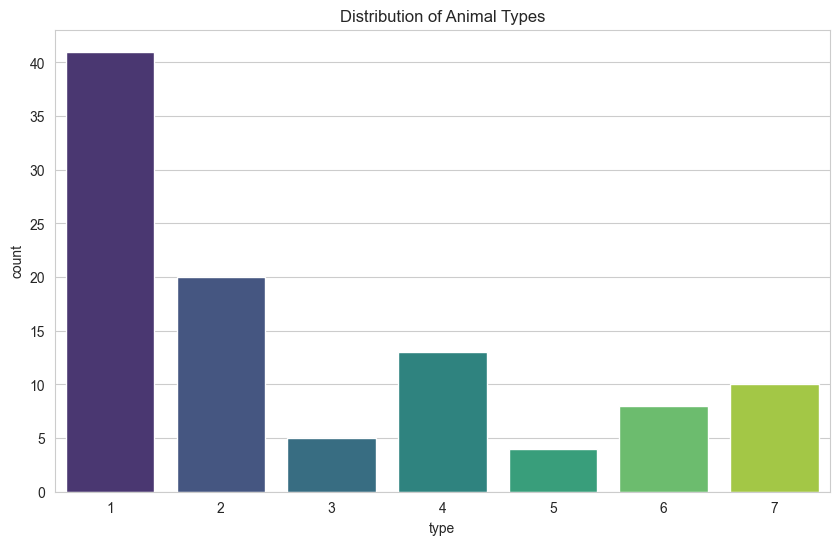

In [14]:
# seaborn의 set_style 함수로 그래프의 배경 스타일을 설정합니다.
sns.set_style('whitegrid')

# 그래프의 크기를 가로 10, 세로 6으로 설정합니다.
plt.figure(figsize=(10, 6))

# seaborn의 countplot 함수를 사용해 막대그래프를 그립니다.
# data=df: df 데이터프레임을 사용합니다.
# x='type': x축의 데이터로 'type' 열을 사용합니다. 각 유형(1~7)별로 데이터 개수를 세어 막대로 표시합니다.
sns.countplot(data=df, x='type', palette='viridis')

# 그래프의 제목을 추가합니다.
plt.title('Distribution of Animal Types')

# 그래프를 화면에 출력합니다.
plt.show()

#### 카운트 플롯 결과 해석:
👉 Type 1 (포유류)이 40마리를 넘어 가장 많고, Type 3, 5 (파충류, 양서류) 등은 10마리 미만으로 매우 적은 것을 볼 수 있습니다. 이는 이 데이터셋에 **클래스 불균형**이 심각하게 존재함을 의미합니다.

### 4-2. 특징과 클래스 간의 관계 확인하기

특정 동물 유형(`type`)은 어떤 특징(`backbone` 등)과 연관이 있을까요? 카운트 플롯에 `hue` 옵션을 사용하면 이를 시각적으로 확인할 수 있습니다.

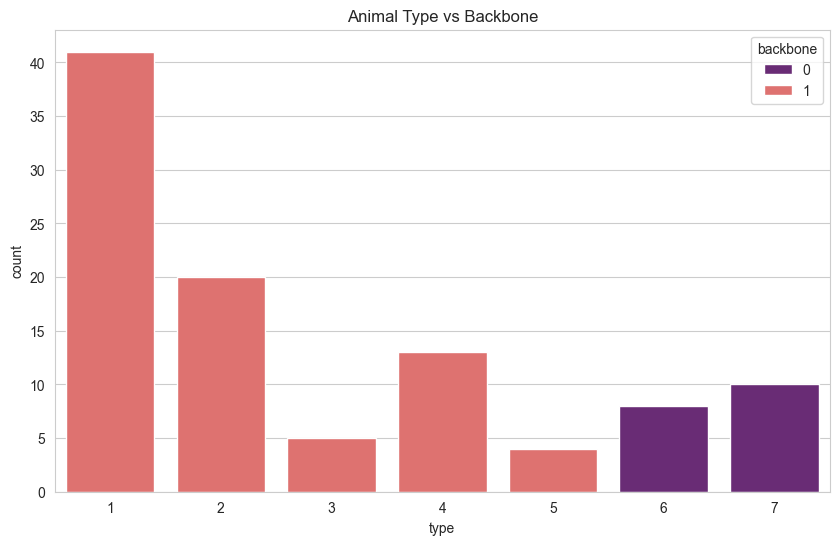

In [15]:
# 그래프의 크기를 설정합니다.
plt.figure(figsize=(10, 6))

# 동물 유형(type)별로 개수를 세되, 척추 유무(backbone)에 따라 막대의 색을 다르게 표시합니다.
# hue='backbone': 'backbone' 열의 값(0 또는 1)에 따라 색을 구분하여 막대를 쌓아 올립니다.
sns.countplot(data=df, x='type', hue='backbone', palette='magma')

# 그래프의 제목을 추가합니다.
plt.title('Animal Type vs Backbone')

# 그래프를 화면에 출력합니다.
plt.show()

#### 결과 해석:
👉 Type 6, 7 (곤충, 무척추동물)은 척추가 없는 동물(backbone=0)만으로 구성되어 있고, 나머지 유형들은 모두 척추가 있는 동물(backbone=1)로만 이루어져 있음을 명확히 볼 수 있습니다. `backbone` 특징이 동물 유형을 나누는 중요한 기준임을 알 수 있습니다.

### 4-3. 히트맵으로 변수 간 상관관계 확인하기

**상관관계 히트맵(Correlation Heatmap)**은 모든 변수 쌍에 대해 얼마나 서로 관련이 있는지를 색깔로 나타낸 표입니다. 붉은색에 가까울수록 강한 양의 상관관계(하나가 1일 때 다른 것도 1일 경향), 푸른색에 가까울수록 강한 음의 상관관계를 의미합니다.

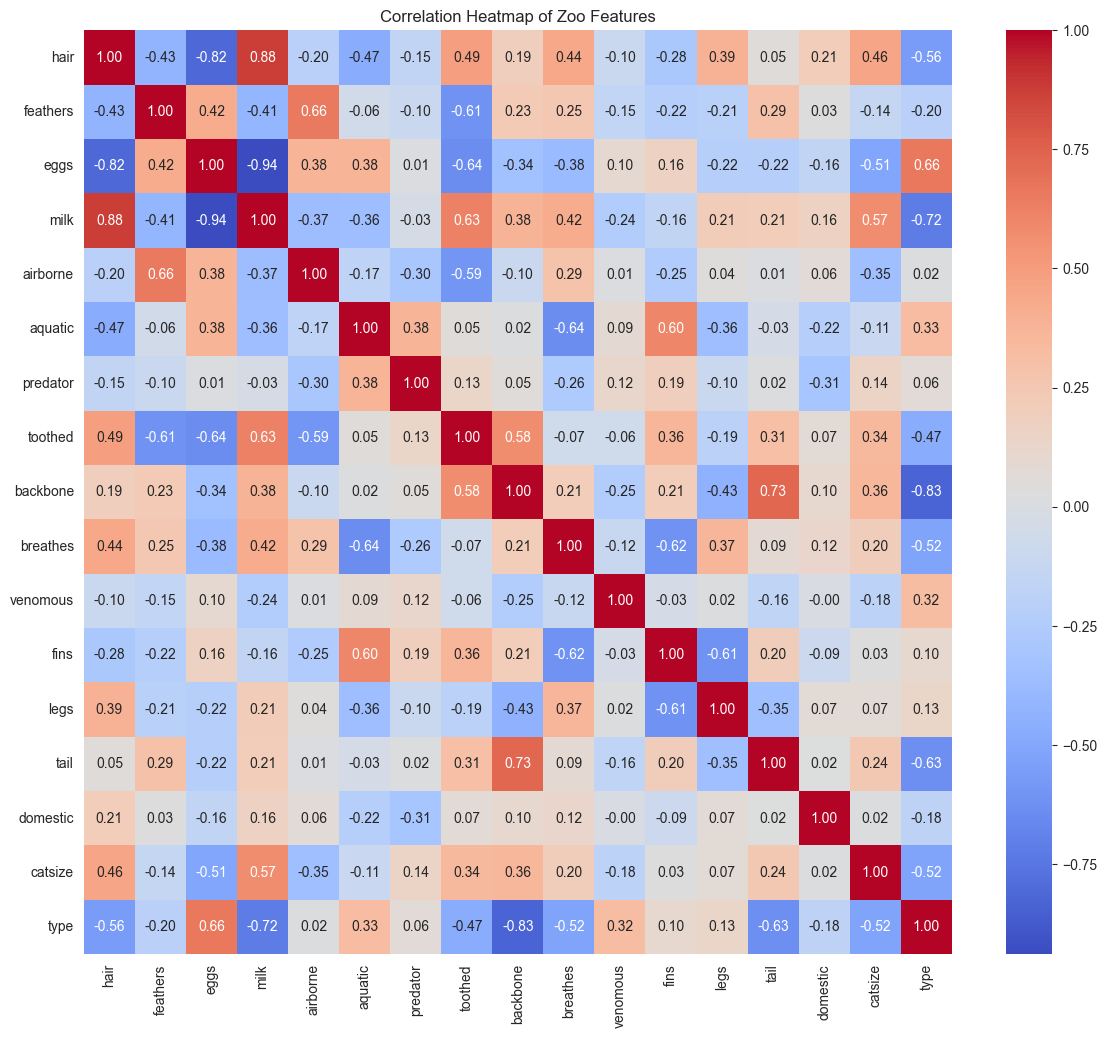

In [16]:
# 데이터프레임의 모든 변수 간의 상관관계를 계산합니다. 결과는 새로운 표 형태로 나옵니다.
correlation_matrix = df.corr()

# 그래프의 크기를 가로 14, 세로 12로 넉넉하게 설정합니다.
plt.figure(figsize=(14, 12))

# seaborn의 heatmap 함수를 사용해 상관관계 매트릭스를 시각화합니다.
# correlation_matrix: 위에서 계산한 상관관계 표를 데이터로 사용합니다.
# annot=True: 각 칸에 실제 상관계수 숫자를 표시해 주는 옵션입니다. (숫자가 너무 많으면 False로 바꾸는게 좋습니다)
# cmap='coolwarm': 색상 테마를 지정합니다. 'coolwarm'은 양수는 붉게, 음수는 푸르게 표시해 줍니다.
# fmt='.2f': 숫자를 소수점 둘째 자리까지 표시하도록 형식을 지정합니다.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# 그래프의 제목을 추가합니다.
plt.title('Correlation Heatmap of Zoo Features')

# 그래프를 화면에 출력합니다.
plt.show()

#### 히트맵 결과 해석:
👉 `hair`와 `milk` 사이의 상관계수가 0.88로 매우 붉고 높은 것을 볼 수 있습니다. 이는 털이 있는 동물은 젖을 먹이는 경향이 매우 강하다는 것을 의미합니다.
👉 `eggs`와 `milk`는 -0.94로 매우 푸르고 강한 음의 상관관계를 보입니다. 이는 알을 낳는 동물은 젖을 먹이지 않는다는 것을 보여줍니다.

## 정리 및 다음 단계

**Zoo 데이터셋 분석을 성공적으로 마쳤습니다!**

이번 분석을 통해:
1.  대부분의 특징이 **이진(Boolean) 변수**로 구성된 데이터셋을 다루어 보았습니다.
2.  **카운트 플롯**을 사용하여 범주형 데이터의 분포와 **클래스 불균형** 문제를 시각적으로 확인했습니다.
3.  **상관관계 히트맵**을 통해 변수들 사이의 숨겨진 관계를 파악했습니다.

이 데이터셋은 클래스 불균형이 심하고 변수들이 명확한 규칙을 가지고 있기 때문에, **결정 트리(Decision Tree)**나 **랜덤 포레스트(Random Forest)** 같은 트리 기반 모델의 학습 예제로 사용하기에 매우 적합합니다. 앞으로 이 데이터로 직접 모델을 만들어보는 것도 좋은 연구가 될 것입니다.